# Inflation versus Dollar Cost Averaging on Pension Fund with Data Library

When investing in a retirement fund using DCA(Dollar-Cost Averaging) strategy, does it perform better than the inflation rate?

In this Notebook, we will find out what is the past inflation rate in Thailand. Then we will find out how the DCA on a fund performs.

And finally, we will plot a bar chart to compare the average return against inflation.


## <a id="rdp_lib"></a>Introduction to the Data Library for Python

The [Data Library for Python](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python) provides a set of ease-of-use interfaces offering coders uniform access to the breadth and depth of financial data and services available on the Workspace, RDP, and Real-Time Platforms. The API is designed to provide consistent access through multiple access channels and target both Professional Developers and Financial Coders. Developers can choose to access content from the desktop, through their deployed streaming services, or directly to the cloud. With the Data Library, the same Python code can be used to retrieve data regardless of which access point you choose to connect to the platform.

![Figure-1](images/datalib_image.png "Data Library Diagram") 

The Data Library are available in the following programming languages:

- [Python](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python)
- [.NET](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-net)
- [TypeScript](https://developers.lseg.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-typescript)

For more deep detail regarding the Data Library for Python, please refer to the following articles and tutorials:

- [Quickstart](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python/quick-start).
- [Documentation](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python/documentation).
- [Tutorials](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python/tutorials).
- [GitHub](https://github.com/LSEG-API-Samples/Example.DataLibrary.Python).

### Disclaimer

This project is based on Data Library Python versions **2.1.1** using the Desktop Session only.

**Step 1**: Import Eikon Data APIs and libraries

In [20]:
import lseg.data as ld
import pandas as pd
pd.set_option('display.max_rows', 14)
pd.options.display.float_format = '{:,.2f}'.format

The next step is to open a session defined in a **lseg-data.config.json** configuration file in the same location as notebook file.

You should save a json file **lseg-data.config.json** having your Workspace App Key as follows:

```json
{
    "logs": {
        "level": "debug",
        "transports": {
            "console": {
                "enabled": false
            },
            "file": {
                "enabled": false,
                "name": "lseg-data-lib.log"
            }
        }
    },
    "sessions": {
        "default": "desktop.workspace",
        "desktop": {
            "workspace": {
                "app-key": "YOUR APP KEY GOES HERE!"
            }
        }
    }
}
```
This file should be readily available (e.g. in the current working directory) for the next steps.

Please note that the LSEG Workspace desktop application integrates the API proxy that acts as an interface between the Data library and the Workspace Platform. For this reason, the  Workspace application must be running when you use the Data library with Desktop Session. 

In [21]:
ld.open_session()
#ld.open_session(config_name='./lseg-data.devrel.config.json')

<lseg.data.session.Definition object at 0x12117b680d0 {name='workspace'}>

**Step 2**: Find out the inflation rate

In [22]:
#Step 2:
#Overview on Thailand Consumer Price Index in the past 10+ years
CPIs_RIC = ['aTHCPI', #Thailand Consumer Price Index
            'aTHCPIBK', #Thailand Bangkok Price Index
            'aTHCPIFB', #Food and Non-Alcohol Price Index
            'aTHCPIHOSF/C', #Housing and Furnishing Price Index
            'aTHHPSDHHE/C', #Single House Price Index
            'aTHCPIPMCF/C'] #Personal and Medical Care Price Index

We use the Data Library ```get_history``` function to get inflation rate historical data.

This function returns data as DataFrame object.

In [23]:
CPIs = ld.get_history(CPIs_RIC,interval='quarterly', start='2015-01-01', end='2025-03-03')
CPIs

C:\Projects\Code\Article.EikonAPI.Python.InflationVsDCAFund\ld\Lib\site-packages\lseg\data\_tools\_dataframe.py:177:FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


VALUE,aTHCPI,aTHCPIBK,aTHCPIFB,aTHCPIHOSF/C,aTHHPSDHHE/C,aTHCPIPMCF/C
Date,,,,,,
2015-03-31,90.28,<NA>,<NA>,<NA>,128.67,<NA>
2015-06-30,90.56,<NA>,<NA>,<NA>,128.43,<NA>
2015-09-30,90.47,<NA>,<NA>,<NA>,126.97,<NA>
2015-12-31,90.24,<NA>,<NA>,<NA>,129.10,<NA>
2016-03-31,89.82,<NA>,<NA>,<NA>,128.87,<NA>
...,...,...,...,...,...,...
2024-03-31,99.42,99.83,99.13,99.78,<NA>,100.31
2024-06-30,100.67,100.77,100.82,99.82,<NA>,100.30
2024-09-30,100.88,100.96,101.62,99.81,<NA>,100.01


To make this DataFrame object easier to read, we rename all columns names.

Now we got the price indexes.

In [24]:
CPIs = CPIs.rename(columns={'aTHCPI': 'Thailand',
                    'aTHCPIBK': 'Bangkok',
                    'aTHCPIFB': 'Food & Non-Alcohol',
                    'aTHCPIHOSF/C': 'Housing and Furnishing',
                    'aTHHPSDHHE/C': 'Single-Detached House',
                    'aTHCPIPMCF/C':'Personal and Medical Care'})

CPIs

VALUE,Thailand,Bangkok,Food & Non-Alcohol,Housing and Furnishing,Single-Detached House,Personal and Medical Care
Date,,,,,,
2015-03-31,90.28,<NA>,<NA>,<NA>,128.67,<NA>
2015-06-30,90.56,<NA>,<NA>,<NA>,128.43,<NA>
2015-09-30,90.47,<NA>,<NA>,<NA>,126.97,<NA>
2015-12-31,90.24,<NA>,<NA>,<NA>,129.10,<NA>
2016-03-31,89.82,<NA>,<NA>,<NA>,128.87,<NA>
...,...,...,...,...,...,...
2024-03-31,99.42,99.83,99.13,99.78,<NA>,100.31
2024-06-30,100.67,100.77,100.82,99.82,<NA>,100.30
2024-09-30,100.88,100.96,101.62,99.81,<NA>,100.01


Next, we convert them to percent changes per year.

In [25]:
#Show percent change compare to previous year
#This is actually the inflation
CPIs = CPIs.pct_change()*100
CPIs.dropna(inplace=True)
CPIs

C:\Users\U8004042\AppData\Local\Temp\ipykernel_20440\4077974392.py:3:FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.


VALUE,Thailand,Bangkok,Food & Non-Alcohol,Housing and Furnishing,Single-Detached House,Personal and Medical Care
Date,,,,,,
2021-06-30,0.73,0.64,0.41,0.02,0.75,-0.00
2021-09-30,0.23,0.12,-0.19,-0.90,0.68,0.26
2021-12-31,1.80,1.74,1.31,4.04,0.00,0.03
2022-03-31,1.91,1.98,2.24,0.84,0.00,0.14
2022-06-30,2.38,2.27,2.34,0.74,0.00,0.52
...,...,...,...,...,...,...
2024-03-31,-0.21,-0.04,-0.84,0.35,0.00,0.04
2024-06-30,1.26,0.94,1.70,0.03,0.00,-0.00
2024-09-30,0.21,0.19,0.79,-0.01,0.00,-0.29


**Step 3**: Retrieve Fund NAV for the past years

In [26]:
#Step 3:
#Get Fund NAV from RIC
FundRIC = 'LP63500988'
df1 = ld.get_data(FundRIC,['TR.FundNAV.date','TR.FundNAV'],{'SDate':'2015-01-01','EDate':'2025-03-03'})
df1

,Instrument,Date,NAV
0,LP63500988,2015-01-01,196.06
1,LP63500988,2015-01-02,198.75
2,LP63500988,2015-01-05,198.02
3,LP63500988,2015-01-06,196.04
4,LP63500988,2015-01-07,197.47
...,...,...,...
2648,LP63500988,2025-02-25,247.54
2649,LP63500988,2025-02-26,255.85
2650,LP63500988,2025-02-27,256.52
2651,LP63500988,2025-02-28,246.86


**Step 4**: Define your past contribution.

Please note that these are sample numbers which include random increment per year.

In [27]:
contributions = []
contributions.append([pd.Timestamp('2015-01-01'),100])
contributions.append([pd.Timestamp('2015-02-01'),100])
contributions.append([pd.Timestamp('2015-03-01'),100])
contributions.append([pd.Timestamp('2015-04-01'),100])
contributions.append([pd.Timestamp('2015-05-01'),100])
contributions.append([pd.Timestamp('2015-06-01'),100])
contributions.append([pd.Timestamp('2015-07-01'),100])
contributions.append([pd.Timestamp('2015-08-01'),100])
contributions.append([pd.Timestamp('2015-09-01'),100])
contributions.append([pd.Timestamp('2015-10-01'),100])
contributions.append([pd.Timestamp('2015-11-01'),100])
contributions.append([pd.Timestamp('2015-12-01'),100])
contributions.append([pd.Timestamp('2016-01-01'),113])
contributions.append([pd.Timestamp('2016-02-01'),113])
contributions.append([pd.Timestamp('2016-03-01'),113])
contributions.append([pd.Timestamp('2016-04-01'),113])
contributions.append([pd.Timestamp('2016-05-01'),113])
contributions.append([pd.Timestamp('2016-06-01'),113])
contributions.append([pd.Timestamp('2016-07-01'),113])
contributions.append([pd.Timestamp('2016-08-01'),113])
contributions.append([pd.Timestamp('2016-09-01'),113])
contributions.append([pd.Timestamp('2016-10-01'),113])
contributions.append([pd.Timestamp('2016-11-01'),113])
contributions.append([pd.Timestamp('2016-12-01'),113])
contributions.append([pd.Timestamp('2017-01-01'),116])
contributions.append([pd.Timestamp('2017-02-01'),116])
contributions.append([pd.Timestamp('2017-03-01'),116])
contributions.append([pd.Timestamp('2017-04-01'),116])
contributions.append([pd.Timestamp('2017-05-01'),116])
contributions.append([pd.Timestamp('2017-06-01'),116])
contributions.append([pd.Timestamp('2017-07-01'),116])
contributions.append([pd.Timestamp('2017-08-01'),116])
contributions.append([pd.Timestamp('2017-09-01'),116])
contributions.append([pd.Timestamp('2017-10-01'),116])
contributions.append([pd.Timestamp('2017-11-01'),116])
contributions.append([pd.Timestamp('2017-12-01'),116])
contributions.append([pd.Timestamp('2018-01-01'),120])
contributions.append([pd.Timestamp('2018-02-01'),120])
contributions.append([pd.Timestamp('2018-03-01'),120])
contributions.append([pd.Timestamp('2018-04-01'),120])
contributions.append([pd.Timestamp('2018-05-01'),120])
contributions.append([pd.Timestamp('2018-06-01'),120])
contributions.append([pd.Timestamp('2018-07-01'),120])
contributions.append([pd.Timestamp('2018-08-01'),120])
contributions.append([pd.Timestamp('2018-09-01'),120])
contributions.append([pd.Timestamp('2018-10-01'),120])
contributions.append([pd.Timestamp('2018-11-01'),120])
contributions.append([pd.Timestamp('2018-12-01'),120])
contributions.append([pd.Timestamp('2019-01-01'),125])
contributions.append([pd.Timestamp('2019-02-01'),125])
contributions.append([pd.Timestamp('2019-03-01'),125])
contributions.append([pd.Timestamp('2019-04-01'),125])
contributions.append([pd.Timestamp('2019-05-01'),125])
contributions.append([pd.Timestamp('2019-06-01'),125])
contributions.append([pd.Timestamp('2019-07-01'),125])
contributions.append([pd.Timestamp('2019-08-01'),125])
contributions.append([pd.Timestamp('2019-09-01'),125])
contributions.append([pd.Timestamp('2019-10-01'),125])
contributions.append([pd.Timestamp('2019-11-01'),125])
contributions.append([pd.Timestamp('2019-12-01'),125])
contributions.append([pd.Timestamp('2020-01-01'),146])
contributions.append([pd.Timestamp('2020-02-01'),146])
contributions.append([pd.Timestamp('2020-03-01'),146])
contributions.append([pd.Timestamp('2020-04-01'),146])
contributions.append([pd.Timestamp('2020-05-01'),146])
contributions.append([pd.Timestamp('2020-06-01'),146])
contributions.append([pd.Timestamp('2020-07-01'),146])
contributions.append([pd.Timestamp('2020-08-01'),146])
contributions.append([pd.Timestamp('2020-09-01'),146])
contributions.append([pd.Timestamp('2020-10-01'),146])
contributions.append([pd.Timestamp('2020-11-01'),146])
contributions.append([pd.Timestamp('2020-12-01'),146])
contributions.append([pd.Timestamp('2021-01-01'),155])
contributions.append([pd.Timestamp('2021-02-01'),155])
contributions.append([pd.Timestamp('2021-03-01'),155])
contributions.append([pd.Timestamp('2021-04-01'),155])
contributions.append([pd.Timestamp('2021-05-01'),155])
contributions.append([pd.Timestamp('2021-06-01'),155])
contributions.append([pd.Timestamp('2021-07-01'),155])
contributions.append([pd.Timestamp('2021-08-01'),155])
contributions.append([pd.Timestamp('2021-09-01'),155])
contributions.append([pd.Timestamp('2021-10-01'),155])
contributions.append([pd.Timestamp('2021-11-01'),155])
contributions.append([pd.Timestamp('2021-12-01'),155])
contributions.append([pd.Timestamp('2022-01-01'),160])
contributions.append([pd.Timestamp('2022-02-01'),160])
contributions.append([pd.Timestamp('2022-03-01'),160])
contributions.append([pd.Timestamp('2022-04-01'),160])
contributions.append([pd.Timestamp('2022-05-01'),160])
contributions.append([pd.Timestamp('2022-06-01'),160])
contributions.append([pd.Timestamp('2022-07-01'),160])
contributions.append([pd.Timestamp('2022-08-01'),160])
contributions.append([pd.Timestamp('2022-09-01'),160])
contributions.append([pd.Timestamp('2022-10-01'),160])
contributions.append([pd.Timestamp('2022-11-01'),160])
contributions.append([pd.Timestamp('2022-12-01'),160])
contributions.append([pd.Timestamp('2023-01-01'),166])
contributions.append([pd.Timestamp('2023-02-01'),166])
contributions.append([pd.Timestamp('2023-03-01'),166])
contributions.append([pd.Timestamp('2023-04-01'),166])
contributions.append([pd.Timestamp('2023-05-01'),166])
contributions.append([pd.Timestamp('2023-06-01'),166])
contributions.append([pd.Timestamp('2023-07-01'),166])
contributions.append([pd.Timestamp('2023-08-01'),166])
contributions.append([pd.Timestamp('2023-09-01'),166])
contributions.append([pd.Timestamp('2023-10-01'),166])
contributions.append([pd.Timestamp('2023-11-01'),166])
contributions.append([pd.Timestamp('2023-12-01'),166])
contributions.append([pd.Timestamp('2024-01-01'),172])
contributions.append([pd.Timestamp('2024-02-01'),172])
contributions.append([pd.Timestamp('2024-03-01'),172])
contributions.append([pd.Timestamp('2024-04-01'),172])
contributions.append([pd.Timestamp('2024-05-01'),172])
contributions.append([pd.Timestamp('2024-06-01'),172])
contributions.append([pd.Timestamp('2024-07-01'),172])
contributions.append([pd.Timestamp('2024-08-01'),172])
contributions.append([pd.Timestamp('2024-09-01'),172])
contributions.append([pd.Timestamp('2024-10-01'),172])
contributions.append([pd.Timestamp('2024-11-01'),172])
contributions.append([pd.Timestamp('2024-12-01'),172])
contributions.append([pd.Timestamp('2025-01-01'),179])
contributions.append([pd.Timestamp('2025-02-01'),179])
contributions.append([pd.Timestamp('2025-03-01'),179])



**Step 5**: Fill contribution data into NAV DataFrame using the date.

If the date could not be found in NAV DataFrame, add 1 day to the date (until the NAV is found).

Then remove all the rows without a contribution

In [28]:
#Step 5:
#Add Amount Invested column and set its value to 0
df1['AmountInvested'] = 0.0

#Convert Date column from object to datetime64
df1['Date'] =  pd.to_datetime(df1['Date'], infer_datetime_format=True)

#Loop through contributions and add Amount Invested to dataframe
#If the NAV of the date contributed could not be found, add 1 day until NAV is found
for contribution in contributions:
    searchingDay = contribution[0]
    while (len(df1.loc[df1['Date'] == searchingDay, 'AmountInvested'])==0):
        searchingDay += pd.DateOffset(1)
    df1.loc[df1['Date'] == searchingDay, 'AmountInvested'] = contribution[1]

#Drop any row without contribution from dataframe
df1 = df1[df1["AmountInvested"] > 0]
df1 = df1.reset_index(drop=True)

df1

C:\Users\U8004042\AppData\Local\Temp\ipykernel_20440\3007184777.py:6:UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.


,Instrument,Date,NAV,AmountInvested
0,LP63500988,2015-01-01,196.06,100.00
1,LP63500988,2015-02-02,201.49,100.00
2,LP63500988,2015-03-02,205.86,100.00
3,LP63500988,2015-04-01,210.76,100.00
4,LP63500988,2015-05-01,237.52,100.00
...,...,...,...,...
118,LP63500988,2024-11-01,227.32,172.00
119,LP63500988,2024-12-02,217.85,172.00
120,LP63500988,2025-01-01,222.21,179.00
121,LP63500988,2025-02-03,220.71,179.00


**Step 6**: Add calculated data to the DataFrame. They are Total Amount Invested, Unit Invested, Total Unit Invested and Gain/Loss columns.

Once you complete this step, you are able to see how much you gain(or loss).

But this still does not give you the idea of how much it grows per year on average.

In [29]:
#Step 6:

# Add Total Amount Invested column and set its value to cumulative summation of Amount Invested
df1['TotalAmountInvested'] = df1['AmountInvested'].cumsum()

#Add Unit Invested column and set its value to Amount Invested / NAV
df1['UnitInvested'] = df1['AmountInvested']/df1['NAV']

#Add Total Unit Invested column and set its value to cumulative summation of Unit Invested
df1['TotalUnitInvested'] = df1['UnitInvested'].cumsum()

#Add Total Value column and set its value to Total Unit Invested * NAV
df1['TotalValue'] = df1['NAV']*df1['TotalUnitInvested']

#Add Absolute Gain or Loss and set its value to Total Value - Total Amount Invested
df1['Gain/Loss'] = df1['TotalValue']-df1['TotalAmountInvested']
df1

,Instrument,Date,NAV,AmountInvested,TotalAmountInvested,UnitInvested,TotalUnitInvested,TotalValue,Gain/Loss
0,LP63500988,2015-01-01,196.06,100.00,100.00,0.51,0.51,100.00,-0.00
1,LP63500988,2015-02-02,201.49,100.00,200.00,0.50,1.01,202.77,2.77
2,LP63500988,2015-03-02,205.86,100.00,300.00,0.49,1.49,307.17,7.17
3,LP63500988,2015-04-01,210.76,100.00,400.00,0.47,1.97,414.48,14.48
4,LP63500988,2015-05-01,237.52,100.00,500.00,0.42,2.39,567.10,67.10
...,...,...,...,...,...,...,...,...,...
118,LP63500988,2024-11-01,227.32,172.00,"16,304.00",0.76,70.18,"15,954.00",-350.00
119,LP63500988,2024-12-02,217.85,172.00,"16,476.00",0.79,70.97,"15,461.37","-1,014.63"
120,LP63500988,2025-01-01,222.21,179.00,"16,655.00",0.81,71.78,"15,949.81",-705.19
121,LP63500988,2025-02-03,220.71,179.00,"16,834.00",0.81,72.59,"16,021.14",-812.86


**Step 7**: Get current NAV

In [30]:
#Step 7:
#Get current NAV and calculate Total Unit Invested, Total Value and Absolute Gain/Loss
df2 = ld.get_data(FundRIC,['TR.FundNAV.date','TR.FundNAV'])
df2['Date'] =  pd.to_datetime(df2['Date'], infer_datetime_format=True)
df2["AmountInvested"] = 0
df2["TotalAmountInvested"] = df1.tail(1)["TotalAmountInvested"].values[0]
df2["UnitInvested"] = 0
df2["TotalUnitInvested"] = df1.tail(1)["TotalUnitInvested"].values[0]
df2['TotalValue'] = df2['NAV']*df2['TotalUnitInvested']
df2['Gain/Loss'] = df2['TotalValue']-df2['TotalAmountInvested']
df2

C:\Users\U8004042\AppData\Local\Temp\ipykernel_20440\3279585495.py:4:UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.


,Instrument,Date,NAV,AmountInvested,TotalAmountInvested,UnitInvested,TotalUnitInvested,TotalValue,Gain/Loss
0,LP63500988,2025-04-18,229.14,0,"17,013.00",0,73.31,"16,798.12",-214.88


Append it to the previous DataFrame object.

In [31]:
df1 = pd.concat([df1, df2], ignore_index = True)
df1

,Instrument,Date,NAV,AmountInvested,TotalAmountInvested,UnitInvested,TotalUnitInvested,TotalValue,Gain/Loss
0,LP63500988,2015-01-01,196.06,100.00,100.00,0.51,0.51,100.00,-0.00
1,LP63500988,2015-02-02,201.49,100.00,200.00,0.50,1.01,202.77,2.77
2,LP63500988,2015-03-02,205.86,100.00,300.00,0.49,1.49,307.17,7.17
3,LP63500988,2015-04-01,210.76,100.00,400.00,0.47,1.97,414.48,14.48
4,LP63500988,2015-05-01,237.52,100.00,500.00,0.42,2.39,567.10,67.10
...,...,...,...,...,...,...,...,...,...
119,LP63500988,2024-12-02,217.85,172.00,"16,476.00",0.79,70.97,"15,461.37","-1,014.63"
120,LP63500988,2025-01-01,222.21,179.00,"16,655.00",0.81,71.78,"15,949.81",-705.19
121,LP63500988,2025-02-03,220.71,179.00,"16,834.00",0.81,72.59,"16,021.14",-812.86
122,LP63500988,2025-03-03,248.51,179.00,"17,013.00",0.72,73.31,"18,218.12","1,205.12"


**Step 8**: Define ```xirr()``` function

This XIRR is the internal rate of return for a schedule of cash flows that is not necessarily periodic.

In [32]:
#Step 8:
#Define xirr function
#https://stackoverflow.com/questions/8919718/financial-python-library-that-has-xirr-and-xnpv-function
def xirr(transactions):
    years = [(ta[0] - transactions[0][0]).days / 365.0 for ta in transactions]
    residual = 1
    step = 0.05
    guess = 0.05
    epsilon = 0.0001
    limit = 10000
    while abs(residual) > epsilon and limit > 0:
        limit -= 1
        residual = 0.0
        for i, ta in enumerate(transactions):
            residual += ta[1] / pow(guess, years[i])
        if abs(residual) > epsilon:
            if residual > 0:
                guess += step
            else:
                guess -= step
                step /= 2.0
    return guess-1

#Uncomment this code to test xirr function
#tas = []
#tas.append([pd.Timestamp(2008,1,1),-100])
#tas.append([pd.Timestamp(2009,1,1),-100])
#tas.append([pd.Timestamp(2010,1,1),230])
#print(xirr(tas)*100)

**Step 9**: Prepare data from DataFrame for the ```xirr()``` function

In [33]:
#Step 9:
#Extract data from Dataframe and prepare it for xirr function

#For xirr function, invested money is negative
df1['AmountInvested'] = df1['AmountInvested']*-1
#Get Date and amount
tas = df1[['Date','AmountInvested']].values.tolist()
#The current date(last row) value is a positive number and it is the Total Value
tas[-1][1] = df1.tail(1)["TotalValue"].values[0]

Calculate xirr

In [34]:
AverageReturn = xirr(tas) * 100
print("%.2f" % AverageReturn)

-0.27


**Step 10**: Compare between Inflation and Average Return

First, let add "Return" to the CPIs DataFrame

In [35]:
#Step 10:
#Add Average Return to the dataframe
CPIs['Return'] = AverageReturn
CPIs

VALUE,Thailand,Bangkok,Food & Non-Alcohol,Housing and Furnishing,Single-Detached House,Personal and Medical Care,Return
Date,,,,,,,
2021-06-30,0.73,0.64,0.41,0.02,0.75,-0.00,-0.27
2021-09-30,0.23,0.12,-0.19,-0.90,0.68,0.26,-0.27
2021-12-31,1.80,1.74,1.31,4.04,0.00,0.03,-0.27
2022-03-31,1.91,1.98,2.24,0.84,0.00,0.14,-0.27
2022-06-30,2.38,2.27,2.34,0.74,0.00,0.52,-0.27
...,...,...,...,...,...,...,...
2024-03-31,-0.21,-0.04,-0.84,0.35,0.00,0.04,-0.27
2024-06-30,1.26,0.94,1.70,0.03,0.00,-0.00,-0.27
2024-09-30,0.21,0.19,0.79,-0.01,0.00,-0.29,-0.27


Next, plot bar chart to compare the inflation rates and average return.

<Axes: xlabel='Date'>

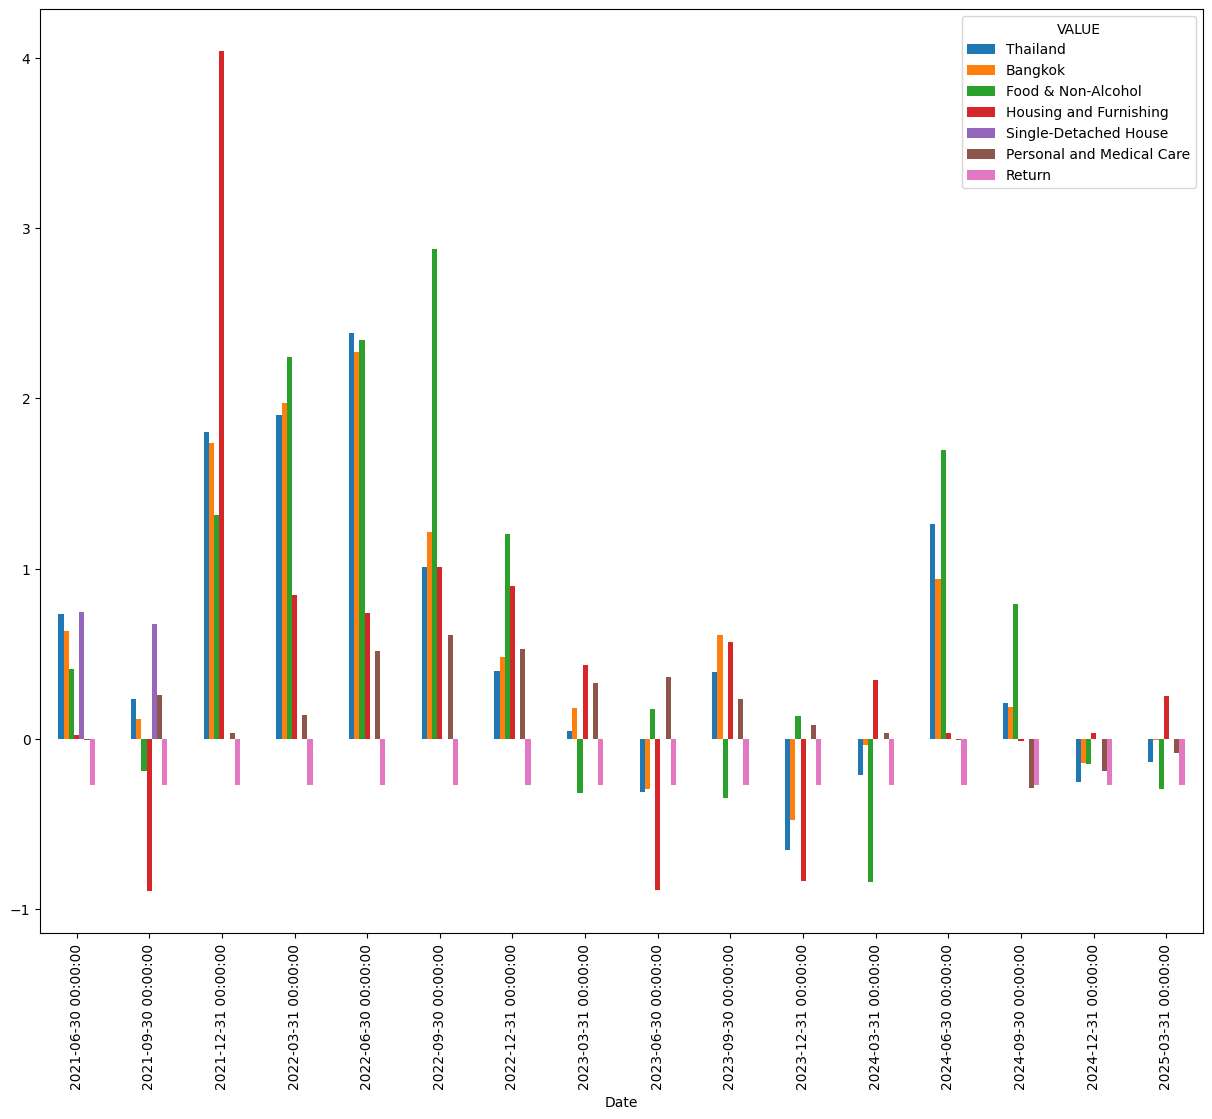

In [36]:
#Plot Bar Chart to compare inflation and average return
CPIs.plot.bar(figsize=(15,12))

You can see from the bar chart that the average return from the sample DCA investing on "LP63500988" fund usually lost against inflation.

You can try running this Jupyter Notebook sample using your own contribution data and use the actual fund you are DCA investing in.

The final step is closing the Workspace session.

In [19]:
ld.close_session()

## <a id="references"></a>References

You can find more detail regarding the Data Library and related technologies for this Notebook from the following resources:

- [LSEG Data Library for Python](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python) on the [LSEG Developer Community](https://developers.lseg.com/) website.
- [Data Library for Python - Reference Guide](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python/documentation#reference-guide)
- [The Data Library for Python  - Quick Reference Guide (Access layer)](https://developers.lseg.com/en/article-catalog/article/the-data-library-for-python-quick-reference-guide-access-layer) article.
- [Essential Guide to the Data Libraries - Generations of Python library (EDAPI, RDP, RD, LD)](https://developers.lseg.com/en/article-catalog/article/essential-guide-to-the-data-libraries) article.
- [Upgrade from using Eikon Data API to the Data library](https://developers.lseg.com/en/article-catalog/article/Upgrade-from-using-Eikon-Data-API-to-the-Data-library) article.
- [Data Library for Python Examples on GitHub](https://github.com/LSEG-API-Samples/Example.DataLibrary.Python) repository.
- [XIRR function](https://support.microsoft.com/en-us/office/xirr-function-de1242ec-6477-445b-b11b-a303ad9adc9d)
- [XIRR function in Python](https://stackoverflow.com/questions/8919718/financial-python-library-that-has-xirr-and-xnpv-function).

For any question related to this example or Data Library, please use the Developers Community [Q&A Forum](https://community.developers.refinitiv.com).